# 2. Subamostragem das regiões de interesse

Após o recorte das regiões de interesse no notebook anterior, será efetuado a subamostragem das regiões de interesse, de tal forma que cada imagem resulte em uma imagem na dimensão de 50x50 pixels. É fundamental que as imagens fiquem no mesmo padrão, uma vez que elas serão convertidas em tensores para uma rede neural convolucional em uma próxima etapa.

Contudo, antes das imagens serem convertidas em tensores, é fundamental que elas passem por um processo de verificação. Na etapa de subamostragem, parte das informações importantes podem acabar sendo perdidas no processo. Para isso é fundamental avaliarmos o gráfico do espectro de frequência da imagem para uma melhor avaliação.

Abaixo, um exemplo de subamostragem de uma imagem:

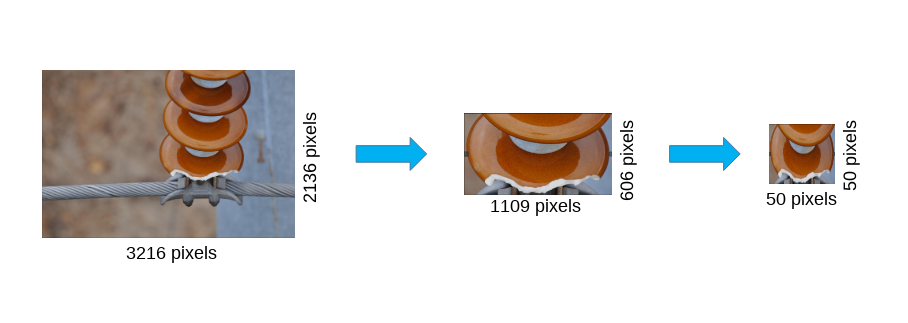

In [46]:
# Importacao de bibliotecas

%matplotlib inline
from PIL import Image
import numpy as np
import cv2
import os
import json
import shutil
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [47]:
# Caminhos utilizados para acessar ou enviar arquivos

# Imagens
caminho_imagens_treinamento = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes/Treinamento"
caminho_imagens_teste = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes/Teste"
caminho_imagens_treinamento_subamostrados = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/Treinamento"
caminho_imagens_teste_subamostrados = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/Teste"
os.makedirs(caminho_imagens_treinamento_subamostrados, exist_ok=True)
os.makedirs(caminho_imagens_teste_subamostrados, exist_ok=True)


# Rotulos
caminho_rotulos_treinamento = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes/rotulos_regioes_treinamento.json"
caminho_rotulos_teste = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes/rotulos_regioes_teste.json"
caminho_rotulos_treinamento_subamostrados = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/rotulos_regioes_treinamento.json"
caminho_rotulos_teste_subamostrados = "/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/rotulos_regioes_teste.json"

In [48]:
def subamostrar_imagem(caminho):
    img = Image.open(caminho)
    img_final = img.resize((50, 50))
    return img_final

## 2.1. Subamostragem do conjunto de treinamento

In [49]:
# Copiar e redimensionar imagens de treinamento
for imagem in os.listdir(caminho_imagens_treinamento):
    imagem_origem = os.path.join(caminho_imagens_treinamento, imagem)
    imagem_destino = os.path.join(caminho_imagens_treinamento_subamostrados, imagem)
        
    # Redimensionar imagem
    img_subamostrada = subamostrar_imagem(imagem_origem)
        
    # Salvar imagem redimensionada
    img_subamostrada.save(imagem_destino)

In [50]:
# Copia arquivo de rotulos de uma pasta para outra
json_origem = caminho_rotulos_treinamento
json_destino = caminho_rotulos_treinamento_subamostrados
shutil.copy(json_origem, json_destino)

'/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/rotulos_regioes_treinamento.json'

### 2.1.1 Exemplo de antes e depois

Exemplo de avaliação de uma imagem do antes e depois após o processo de subamostragem. Perceba que a **foto subamostrada precisou ser "esticada"**, uma vez que ela possui resolução menor.

In [51]:
exemplo_imagem_treinamento = "11468_100228h.JPG"

caminho_exemplo_treinamento_antes = os.path.join(caminho_imagens_treinamento, exemplo_imagem_treinamento)
caminho_exemplo_treinamento_depois = os.path.join(caminho_imagens_treinamento_subamostrados, exemplo_imagem_treinamento)

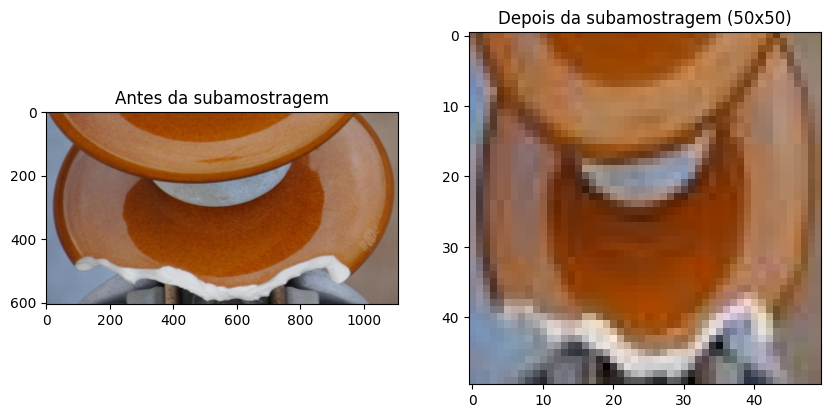

In [52]:
# Carregando as imagens
img_antes = Image.open(caminho_exemplo_treinamento_antes)
img_depois = Image.open(caminho_exemplo_treinamento_depois)

# Criando a figura e os subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Antes do redimensionamento
axes[0].imshow(img_antes)
axes[0].set_title('Antes da subamostragem')
axes[0].axis('on')

# Depois do redimensionamento
axes[1].imshow(img_depois)
axes[1].set_title('Depois da subamostragem (50x50)')
axes[1].axis('on')

plt.show()

## 2.2. Subamostragem do conjunto de teste

In [53]:
# Copiar e redimensionar imagens de treinamento
for imagem in os.listdir(caminho_imagens_teste):
    imagem_origem = os.path.join(caminho_imagens_teste, imagem)
    imagem_destino = os.path.join(caminho_imagens_teste_subamostrados, imagem)
        
    # Redimensionar imagem
    img_subamostrada = subamostrar_imagem(imagem_origem)
        
    # Salvar imagem redimensionada
    img_subamostrada.save(imagem_destino)

In [54]:
# Copia arquivo de rotulos de uma pasta para outra
json_origem = caminho_rotulos_teste
json_destino = caminho_rotulos_teste_subamostrados
shutil.copy(json_origem, json_destino)

'/home/giovanni/Projetos/Local/TCC/Datasets/Recortes_Subamostrados/rotulos_regioes_teste.json'

### 2.2.1. Exemplo de antes e depois

Exemplo de avaliação de uma imagem do antes e depois após o processo de subamostragem. Perceba que a **foto subamostrada precisou ser "esticada"**, uma vez que ela possui resolução menor.

In [55]:
exemplo_imagem_teste = "15_170079.JPG"

caminho_exemplo_teste_antes = os.path.join(caminho_imagens_teste, exemplo_imagem_teste)
caminho_exemplo_teste_depois = os.path.join(caminho_imagens_teste_subamostrados, exemplo_imagem_teste)

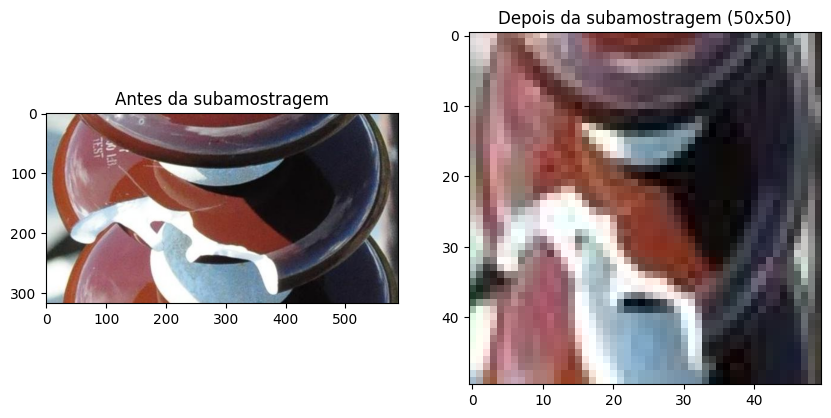

In [56]:
# Carregando as imagens
img_antes = Image.open(caminho_exemplo_teste_antes)
img_depois = Image.open(caminho_exemplo_teste_depois)

# Criando a figura e os subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Antes do redimensionamento
axes[0].imshow(img_antes)
axes[0].set_title('Antes da subamostragem')
axes[0].axis('on')

# Depois do redimensionamento
axes[1].imshow(img_depois)
axes[1].set_title('Depois da subamostragem (50x50)')
axes[1].axis('on')

plt.show()

## 2.3. Checagem da perda de informações - em andamento, ainda não funcionando

In [57]:
def plotar_espectro(imagem, titulo):
    # Converter imagem para ponto flutuante e normalizar entre 0 e 1
    imagem_float = np.float32(imagem) / 255.0
    # Calcular a transformada de Fourier bidimensional
    f_imagem = np.fft.fft2(imagem_float)
    # Centralizar as frequências
    f_imagem_deslocada = np.fft.fftshift(f_imagem)
    # Calcular o espectro de magnitude
    espectro = 20 * np.log(np.abs(f_imagem_deslocada))
    plt.imshow(espectro, cmap='gray')
    plt.colorbar()
    plt.title(titulo)
    plt.show()

### 2.3.1. Checagem do conjunto de treinamento 

In [60]:
def processar_imagens_treinamento(caminho_imagem_original, caminho_imagem_subamostrada):
    # Carregar imagens
    original = cv2.imread(caminho_imagem_original, cv2.IMREAD_GRAYSCALE)
    subamostrada = cv2.imread(caminho_imagem_subamostrada, cv2.IMREAD_GRAYSCALE)

    # Plotar imagens lado a lado
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original, cmap='gray')
    axs[0].set_title("Original")
    axs[0].axis('off')
    axs[1].imshow(subamostrada, cmap='gray')
    axs[1].set_title("Subamostrada")
    axs[1].axis('off')
    plt.show()

    # Plotar espectro de frequência
    plotar_espectro(original, titulo=os.path.basename(caminho_imagem_original))
    plotar_espectro(subamostrada, titulo=os.path.basename(caminho_imagem_subamostrada))

In [59]:
# Listar imagens de treinamento originais
imagens_originais_treinamento = [os.path.join(caminho_imagens_treinamento, imagem) for imagem in os.listdir(caminho_imagens_treinamento)]
# Listar imagens de treinamento subamostradas
imagens_subamostradas_treinamento = [os.path.join(caminho_imagens_treinamento_subamostrados, imagem) for imagem in os.listdir(caminho_imagens_treinamento_subamostrados)]

# Processar as imagens em paralelo
num_cores = 4  # Número de núcleos de CPU a serem utilizados
Parallel(n_jobs=num_cores)(delayed(processar_imagens_treinamento)(orig, subamostrada) for orig, subamostrada in zip(imagens_originais_treinamento, imagens_subamostradas_treinamento))

/tmp/ipykernel_97573/2343018474.py:9: RuntimeWarning: divide by zero encountered in log


Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Figure(640x480)
Figure(640x480)
Figure(1000x500)
Fig

KeyboardInterrupt: 